In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv('data/Crop_Recommendation.csv')

In [5]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
#Review Nan and duplicates

In [7]:
df.isna().values.any()

False

In [8]:
df.duplicated().values.any()

False

In [9]:
df.shape

(2200, 8)

In [11]:
df.Crop.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [13]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


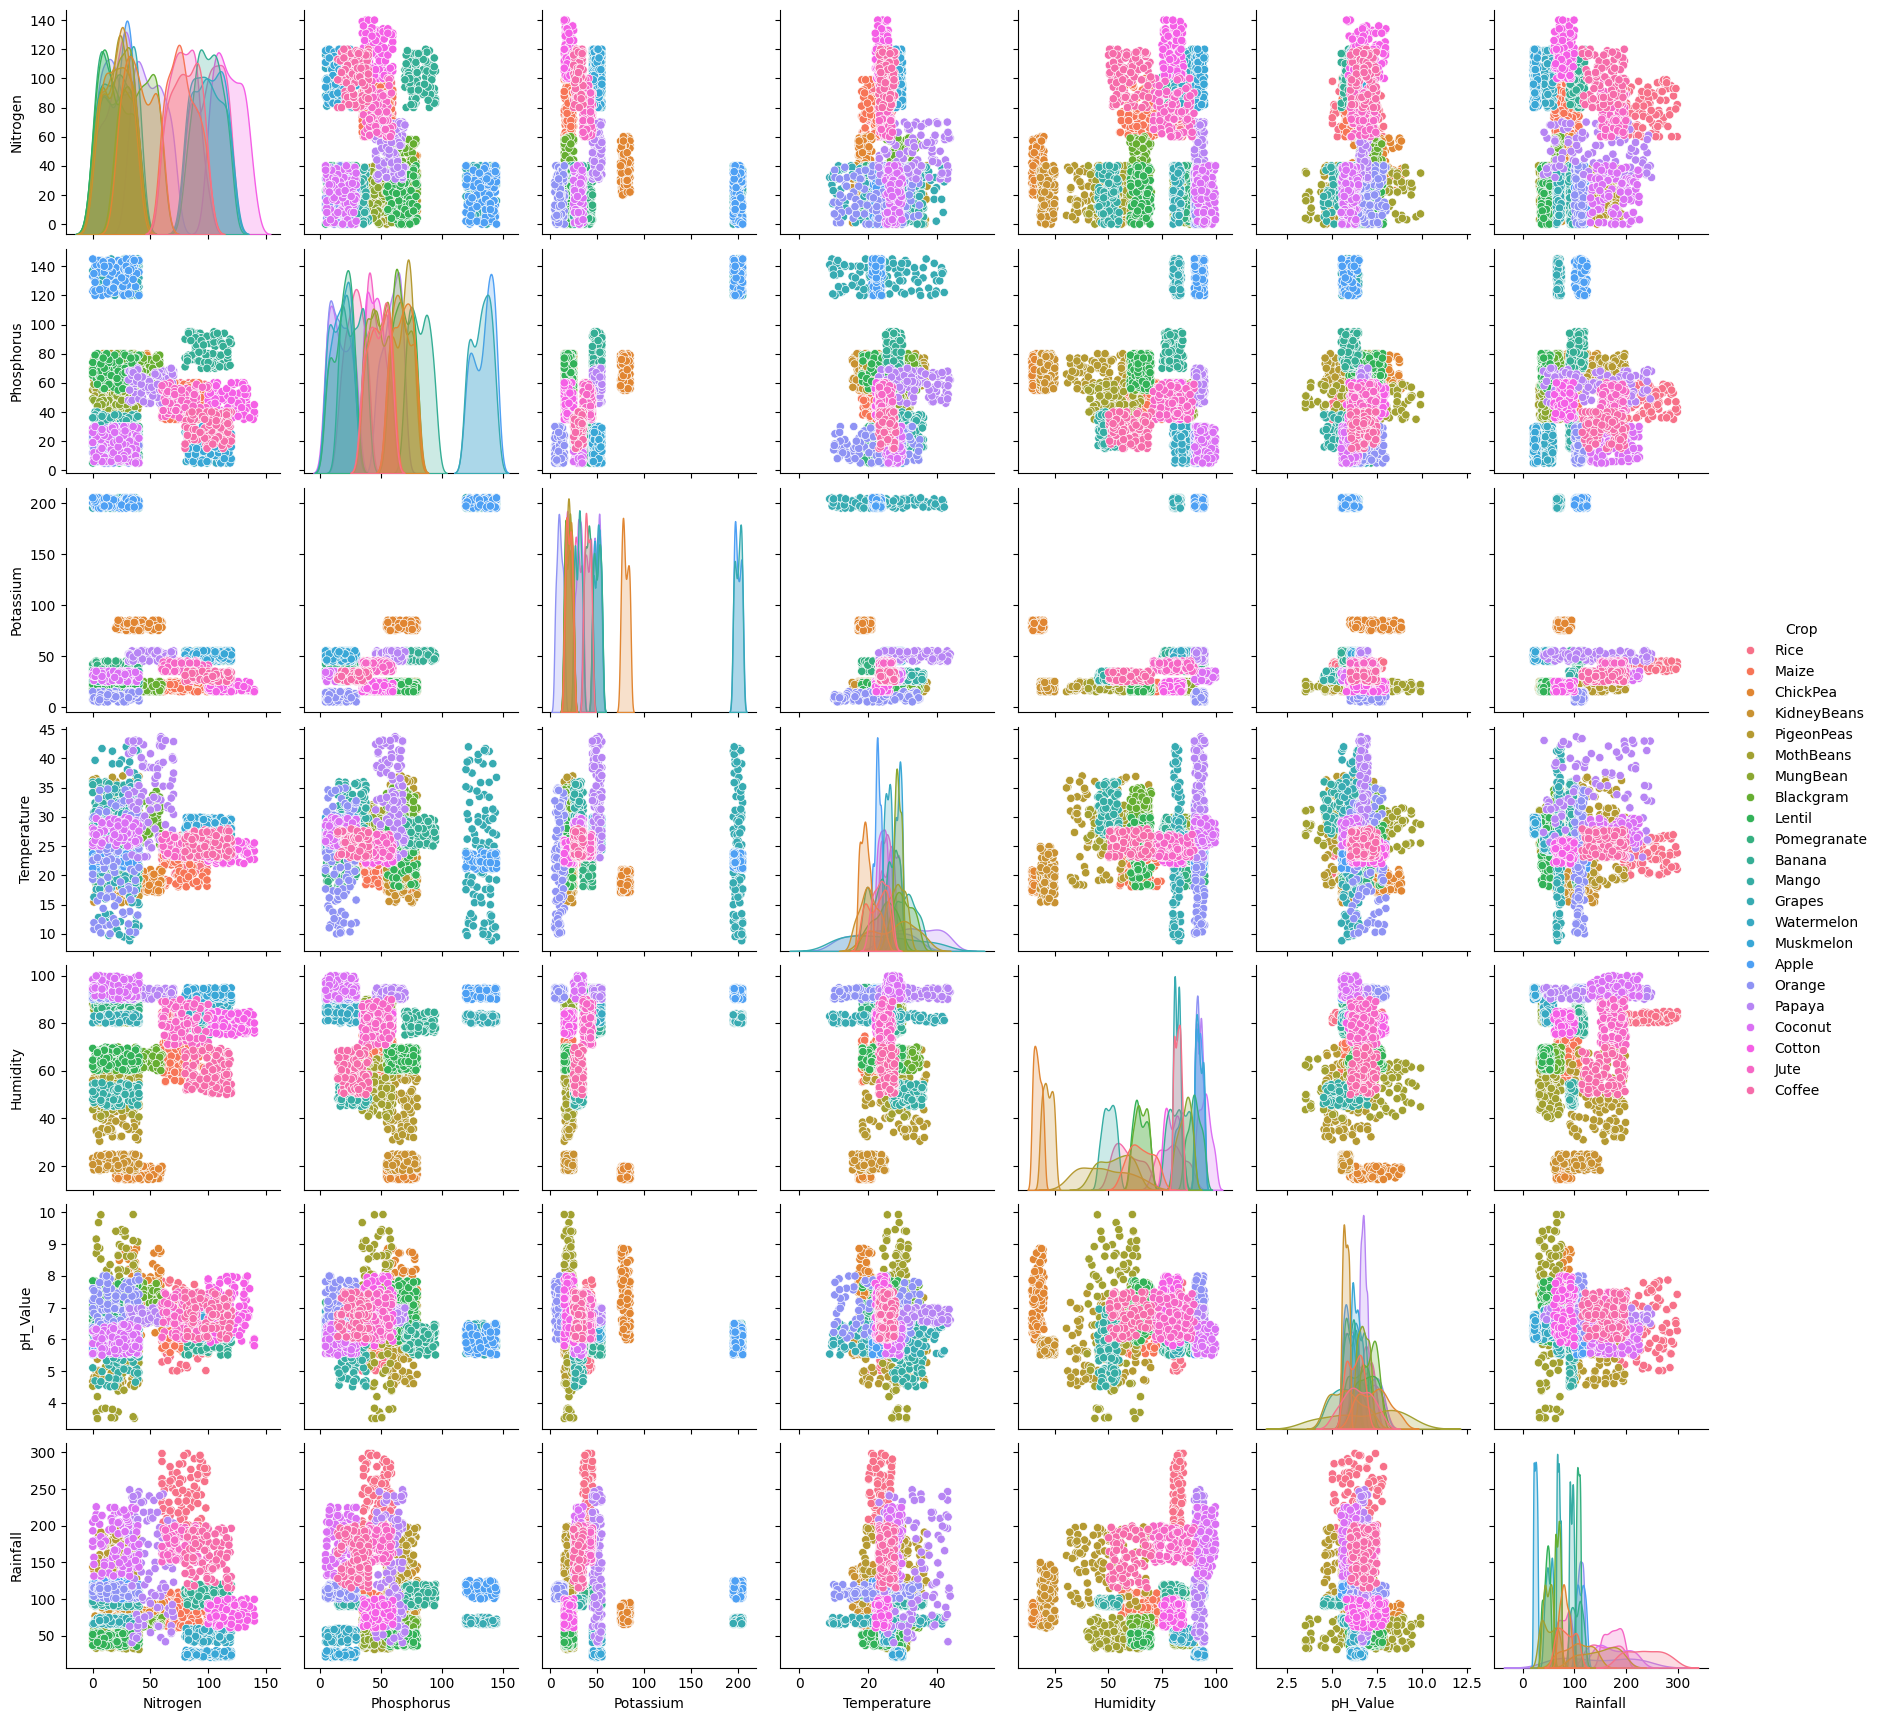

In [12]:
sns.pairplot(data=df, hue = 'Crop')

In [47]:
fig = px.scatter(df, x="Crop", y="Humidity",
                 color="Crop",
                 hover_data=['Crop'], width=1000, height=600)

fig.update(layout_showlegend=False)

fig.show()

In [46]:
fig = px.scatter(df, x="Crop", y="Temperature",
                 color="Crop",
                 hover_data=['Crop'], width=1000, height=600)

fig.update(layout_showlegend=False)

fig.show()

In [49]:
fig = px.scatter(df, x="Crop", y="Nitrogen",
                 color="Crop",
                 hover_data=['Crop'], width=1000, height=600)

fig.update(layout_showlegend=False)

fig.show()

In [ ]:
#Setting x and y for the model

In [15]:
X = df.drop('Crop', axis=1)
y = df['Crop']

In [ ]:
#Setting crop to numbers for analysis

In [18]:
labelEncoder = LabelEncoder()
yEncoded = labelEncoder.fit_transform(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, yEncoded, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier(random_state=42)

In [24]:
from inspect import classify_class_attrs
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Report: \n", classification_report(y_test, y_pred, target_names=labelEncoder.classes_))

Accuracy: 0.99
Report: 
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.96      0.98        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        14
  

In [ ]:
#Checking on other models performance

In [25]:
pip install lazypredict

In [26]:
from lazypredict.Supervised import LazyClassifier

In [27]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [00:09<00:00,  3.25it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

100%|██████████| 29/29 [00:11<00:00,  2.53it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
GaussianNB                         1.00               1.00    None      1.00   
RandomForestClassifier             0.99               0.99    None      0.99   
QuadraticDiscriminantAnalysis      0.99               0.99    None      0.99   
BaggingClassifier                  0.99               0.99    None      0.99   
ExtraTreesClassifier               0.99               0.99    None      0.99   
XGBClassifier                      0.99               0.99    None      0.99   
DecisionTreeClassifier             0.99               0.99    None      0.99   
LGBMClassifier                     0.99               0.99    None      0.99   
LabelPropagation                   0.97               0.97    None      0.97   
LabelSpreading                     0.97               0.97    None      0.97   
SVC                                0.97 

In [28]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gaussianmodel = GaussianNB()

In [34]:
gaussianmodel.fit(X_train, y_train)
y_pred = gaussianmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Report: \n", classification_report(y_test, y_pred, target_names=labelEncoder.classes_))

Accuracy: 1.00
Report: 
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       1.00      1.00      1.00        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      1.00      1.00        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        14
  